# Regressão logística com Python

---
Em 1912, era colocado em mar, o maior navio até então, com 269 metros de comprimento, 28 metros de largura e 53 metros de altura.Sua operação contava com uma tripulação de 892 pessoas e capacidade de até 2435 passageiros, dividido entre três classes.

Este era o Titanic, pensado para ser o navio mais luxuoso e mais seguro de sua época, gerando lendas que era supostamente "inafundável".

E foi com essa toda confiança, em 10 de abril de 1912 que ele partiu de Southampton para Nova Iorque, no caminho passando em Cherbourg-Octeville na França e por Queenstown na Irlanda. E também com toda confiança que em 14 de abril colidiu com um iceberg e naufragou durante a madrugada, matando 1502 pessoas de um total de 2224 passageiros.O naufrágio do Titanic teve como fatores contribuintes causas naturais (como o clima) e causas humanas (negligência e excesso de confiança). 

De fato, os que conseguiram sobreviver tiveram dose de sorte, entretanto, alguns grupos estavam mais propensos a escaparem da morte do que os demais. Por exemplo, mulheres, crianças e passageiros da 1ª Classe. Nota-se essa existência de padrão nos dados disponiveis.

---


Para esta aula, estaremos trabalhando com o [Conjunto de dados do Titanic da Kaggle](https://www.kaggle.com/c/titanic). Este é um conjunto de dados muito famoso e muitas vezes é o primeiro passo em Machine Learning!

Vamos tentar montar um algoritmo de classificação sobrevivente ou falecido utilizando regressão logística no Python.

Usaremos uma versão "semi-limpa" do conjunto de dados do Titanic. Se você usar o conjunto de dados hospedado diretamente no Kaggle, talvez seja necessário fazer uma limpeza adicional não mostrada neste notebook.



## Importar bibliotecas
Vamos importar algumas bibliotecas para começar!

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_rows = 1000

## Os dados

Vamos começar lendo o arquivo titanic_train.csv em um DataFrame pandas.

In [49]:
train = pd.read_csv('titanic_train.csv')


In [50]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Para esta análise exploratória vamos entender cada váriavel, sua importância, se estão com *missing values* e *outliers* e suas distruições estatisticas da váriavel alvo dos Sobreviventes.


Abaixo uma **Descrição dos dados:**
* **Passenger Id:** Número de identificação do passageiro
* **Survived:** Informa se o passageiro sobreviveu ao desastre
    * 0 = Não
    * 1 = Sim
* **Pclass:** Classe do bilhete
    * 1 = 1ª Classe
    * 2 = 2ª Classe
    * 3 = 3ª Classe
* **Name:** Nome do passageiro
* **Sex:** Sexo do passageiro
* **Age:** Idade do passageiro
* **SibSp:** Quantidade de cônjuges e irmãos a bordo
* **Parch:** Quantidade de pais e filhos a bordo
* **Ticket:** Número da passagem
* **Fare:** Preço da Passagem
* **Cabin:** Número da cabine do passageiro
* **Embarked:** Porto no qual o passageiro embarcou
    * C = Cherbourg
    * Q = Queenstown
    * S = Southampton

In [51]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Análise de dados exploratórios

Vamos começar algumas análises de dados exploratórios. Começaremos por verificar os dados que faltam!



### Dados ausentes

Podemos usar seaborn para criar um mapa de calor simples para ver onde estamos perdendo dados!

In [52]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [53]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

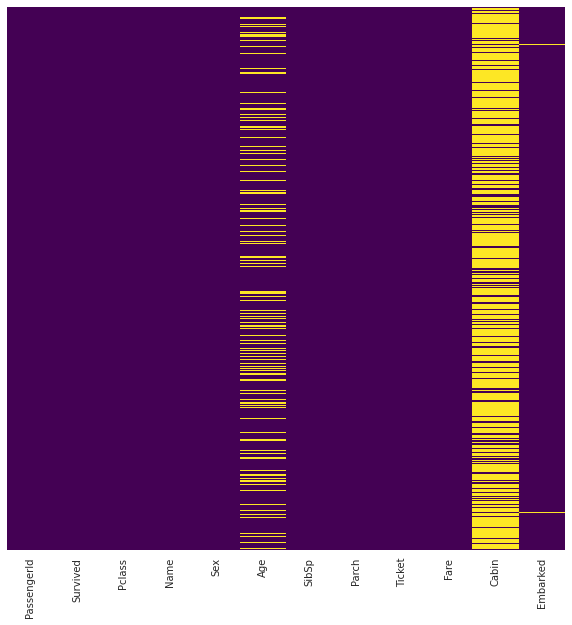

In [54]:
plt.figure(figsize=(10, 10))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Aproximadamente 20% dos dados de idade estão faltando. A proporção de idade que falta é provavelmente pequena o suficiente para que possamos fazer uma substituição razoável com alguma forma de imputação de dados. Olhando para a coluna Cabin, porém, parece que estamos perdendo muito desses dados para fazermos o mesmo. Provavelmente vamos descartar isso mais tarde ou mudá-lo para outro "Cabin Conhecido: 1 ou 0"

Continuemos visualizando mais alguns dos dados! Confira o vídeo para obter explicações completas sobre esses gráficos, este código é apenas para servir como referência.

<AxesSubplot:xlabel='Survived', ylabel='count'>

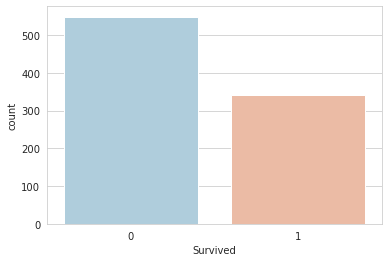

In [55]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

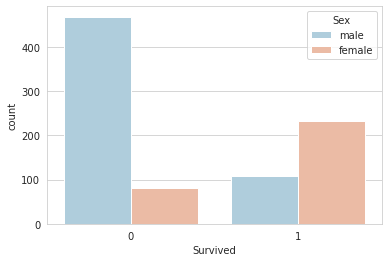

In [56]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

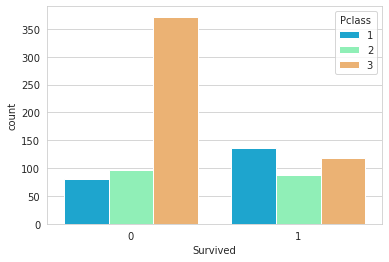

In [57]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

<AxesSubplot:>

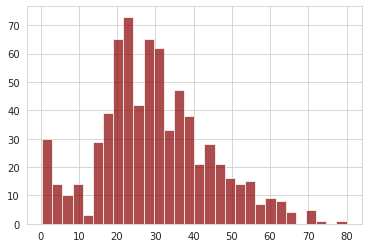

In [58]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

/home/collin/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

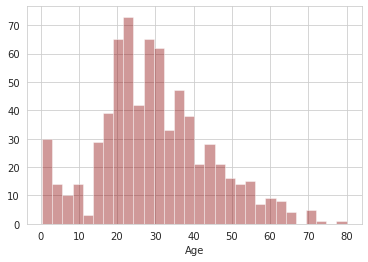

In [59]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

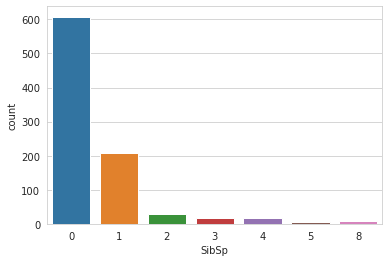

In [60]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

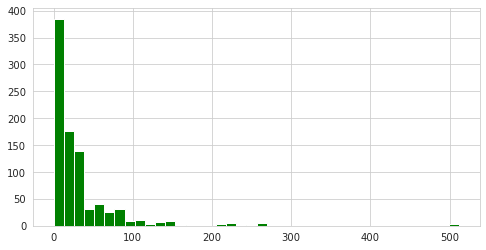

In [61]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

### Treino


___
#### Limpando os dados 


Queremos preencher dados de idade faltantes, em vez de simplesmente deixar cair as linhas de dados de idade que faltam. Uma maneira de fazer isso é preenchendo a idade média de todos os passageiros (imputação).
No entanto, podemos ser mais inteligentes sobre isso e verificar a idade média pela classe de passageiros. Por exemplo:


<AxesSubplot:>

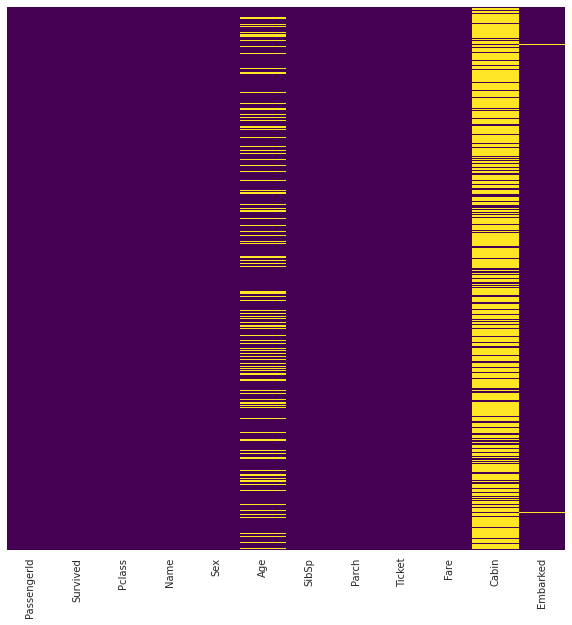

In [62]:
plt.figure(figsize=(10, 10))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

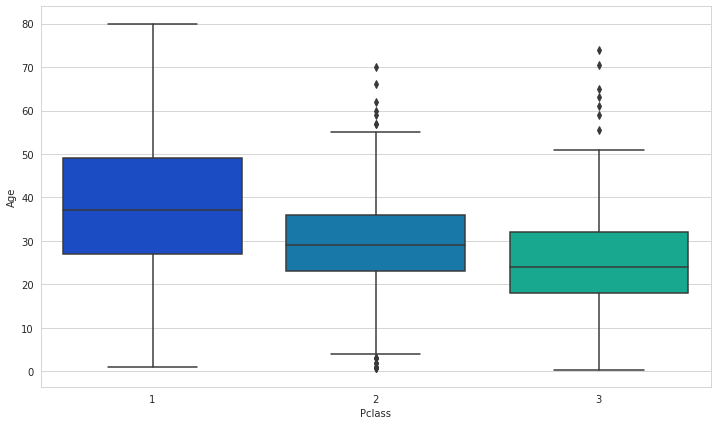

In [63]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

Podemos ver os passageiros mais ricos nas (que estão nas classes superiores) tendem a ser mais velhos, o que faz sentido. Usaremos esses valores de idade média para imputar com base em Pclass for Age.

Agora aplique essa função!

In [64]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
train[["Pclass","Age"]].head(10)

,Pclass,Age
0,3,22.0
1,1,38.0
2,3,26.0
3,1,35.0
4,3,35.0
5,3,NaN
6,1,54.0
7,3,2.0
8,3,27.0
9,2,14.0


In [66]:
train[train["Age"].isnull()][["Pclass","Age"]].head(10)

,Pclass,Age
5,3,NaN
17,2,NaN
19,3,NaN
26,3,NaN
28,3,NaN
29,3,NaN
31,1,NaN
32,3,NaN
36,3,NaN
42,3,NaN


In [67]:
by_pclass = train.groupby([ 'Pclass'])

In [68]:
by_pclass.groups

{1: [1, 3, 6, 11, 23, 27, 30, 31, 34, 35, 52, 54, 55, 61, 62, 64, 83, 88, 92, 96, 97, 102, 110, 118, 124, 136, 137, 139, 151, 155, 166, 168, 170, 174, 177, 185, 187, 194, 195, 209, 215, 218, 224, 230, 245, 248, 252, 256, 257, 258, 262, 263, 268, 269, 270, 273, 275, 284, 290, 291, 295, 297, 298, 299, 305, 306, 307, 309, 310, 311, 318, 319, 325, 329, 331, 332, 334, 336, 337, 339, 341, 351, 356, 366, 369, 370, 373, 375, 377, 380, 383, 390, 393, 412, 430, 434, 435, 438, 445, 447, ...], 2: [9, 15, 17, 20, 21, 33, 41, 43, 53, 56, 58, 66, 70, 72, 78, 84, 98, 99, 117, 120, 122, 123, 133, 134, 135, 144, 145, 148, 149, 150, 161, 178, 181, 183, 190, 191, 193, 199, 211, 213, 217, 219, 221, 226, 228, 232, 234, 236, 237, 238, 239, 242, 247, 249, 259, 265, 272, 277, 288, 292, 303, 308, 312, 314, 316, 317, 322, 323, 327, 340, 342, 343, 344, 345, 346, 357, 361, 385, 387, 389, 397, 398, 399, 405, 407, 413, 416, 417, 418, 426, 427, 432, 437, 439, 440, 443, 446, 450, 458, 463, ...], 3: [0, 2, 4, 5, 7, 8, 

In [69]:
by_pclass["Age"].get_group(2)

9      14.00
15     55.00
17       NaN
20     35.00
21     34.00
33     66.00
41     27.00
43      3.00
53     29.00
56     21.00
58      5.00
66     29.00
70     32.00
72     21.00
78      0.83
84     17.00
98     34.00
99     34.00
117    29.00
120    21.00
122    32.50
123    32.50
133    29.00
134    25.00
135    23.00
144    18.00
145    19.00
148    36.50
149    42.00
150    51.00
161    40.00
178    30.00
181      NaN
183     1.00
190    32.00
191    19.00
193     3.00
199    24.00
211    35.00
213    30.00
217    42.00
219    30.00
221    27.00
226    19.00
228    18.00
232    59.00
234    24.00
236    44.00
237     8.00
238    19.00
239    33.00
242    29.00
247    24.00
249    54.00
259    50.00
265    36.00
272    41.00
277      NaN
288    42.00
292    36.00
303      NaN
308    30.00
312    26.00
314    43.00
316    24.00
317    54.00
322    30.00
323    22.00
327    36.00
340     2.00
342    28.00
343    25.00
344    36.00
345    24.00
346    40.00
357    38.00
361    29.00

In [70]:
round(by_pclass['Age'].get_group(2).mean())

30

In [71]:
input_age = lambda series: round(series.fillna(series.mean())) 
train['Age'] = by_pclass['Age'].transform(input_age)

In [72]:
train[train["Pclass"] == 2][["Pclass","Age"]].head(20)

,Pclass,Age
9,2,14.0
15,2,55.0
17,2,30.0
20,2,35.0
21,2,34.0
33,2,66.0
41,2,27.0
43,2,3.0
53,2,29.0
56,2,21.0


Agora vamos verificar esse mapa de calor novamente!

<AxesSubplot:>

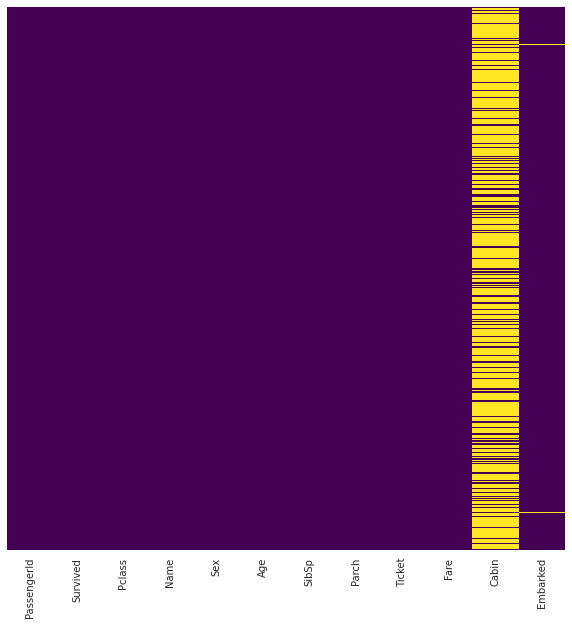

In [73]:
plt.figure(figsize=(10, 10))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Ótimo! Vamos seguir em frente e deletar a coluna Cabin e a linha em Embarked que falta dado.

In [74]:
train.drop('Cabin',axis=1,inplace=True)

In [75]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

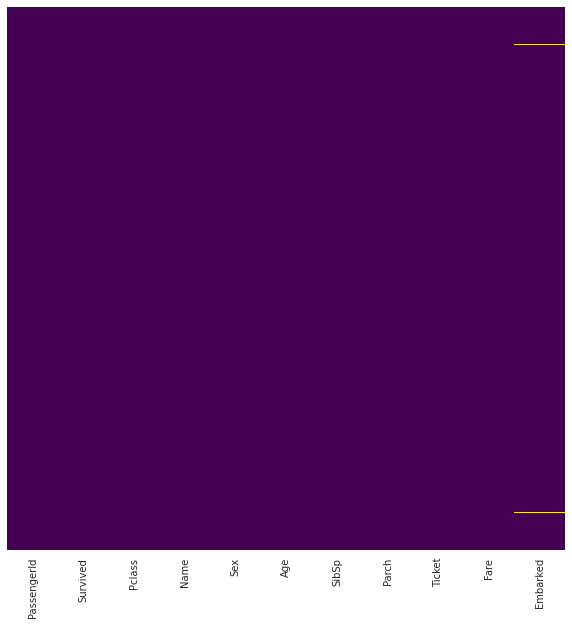

In [76]:
plt.figure(figsize=(10, 10))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [77]:
train.dropna(inplace=True)

<AxesSubplot:>

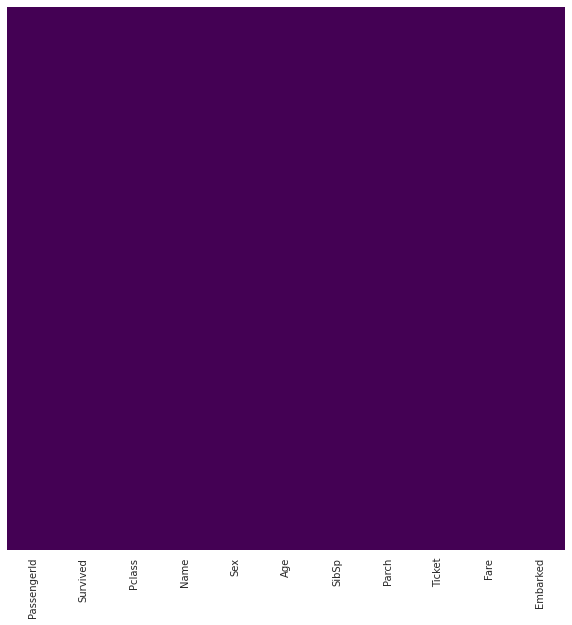

In [78]:
plt.figure(figsize=(10, 10))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [79]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [80]:
train.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

#### Convertendo recursos categóricos

Precisamos converter características categóricas em variáveis dummy usando pandas! Caso contrário, nosso algoritmo de Machine Learning não será capaz de aceitar esses recursos diretamente como entradas.

In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [82]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [83]:
labelencoder_Sex = LabelEncoder()
train["Sex"] = labelencoder_Sex.fit_transform(train["Sex"])

In [84]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [85]:
tcols=train.columns
for loc, item in ([0,"C"],[1,"Q"],[2,"S"]):
    tcols=tcols.insert(loc,item)
    
tcols=tcols.drop('Embarked')
tcols

Index(['C', 'Q', 'S', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

In [86]:
ct = ColumnTransformer([("Embarkeds", OneHotEncoder(), ["Embarked"])], remainder = 'passthrough')
train = pd.DataFrame(ct.fit_transform(train),columns=tcols)


In [87]:
train.head()

,C,Q,S,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.0,0.0,1.0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500
1,1.0,0.0,0.0,1.0,1.0,0.0,38.0,1.0,0.0,71.2833
2,0.0,0.0,1.0,1.0,3.0,0.0,26.0,0.0,0.0,7.9250
3,0.0,0.0,1.0,1.0,1.0,0.0,35.0,1.0,0.0,53.1000
4,0.0,0.0,1.0,0.0,3.0,1.0,35.0,0.0,0.0,8.0500


Ótimo! Nossos dados estão prontos para o nosso modelo

## Construindo um modelo de Regressão Logística

Vamos começar dividindo nossos dados em um conjunto de treinamento e conjunto de testes (há outro arquivo test.csv que você pode usar ao invés, caso queira usar todos esses dados para treinar).



### Divisão treino-teste

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=0)

### Training and Predicting

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/home/collin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [92]:
predictions = logmodel.predict(X_test)

Vamos seguir em frente para avaliar o nosso modelo!

## Avaliação

Podemos verificar a precisão, o recall e a pontuação f1 usando o relatório de classificação!

In [93]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [94]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.78      0.83      0.81       157
         1.0       0.74      0.67      0.70       110

    accuracy                           0.77       267
   macro avg       0.76      0.75      0.76       267
weighted avg       0.77      0.77      0.77       267



In [95]:
cm = confusion_matrix(y_test, predictions)

In [96]:
cm

array([[131,  26],
       [ 36,  74]])

/home/collin/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/collin/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Matriz de Confusão, sem normalização
[[131  26]
 [ 36  74]]
Normalizada
[[0.8343949  0.1656051 ]
 [0.32727273 0.67272727]]


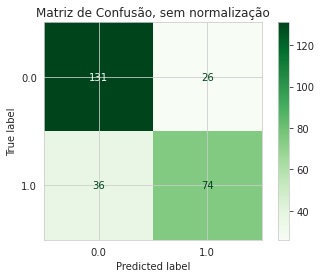

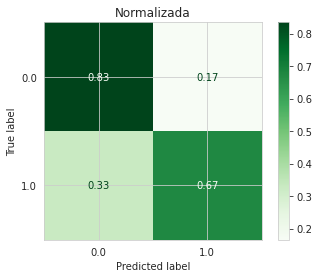

In [97]:
titles_options = [("Matriz de Confusão, sem normalização", None),
                  ("Normalizada", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logmodel, X_test, y_test,
                                 
                                 cmap=plt.cm.Greens,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Não foi tão ruim! Você pode querer explorar outros recursos no outro arquivo titanic_text.csv. Algumas sugestões:

* Tente pegar o título (Dr., Sr., Sra., Etc.) do nome como parâmetro.
* Talvez a cabine possa ser uma característica.
* Existe alguma informação que você pode obter do bilhete?